In [106]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df=pd.read_csv('C:\\Users\\LAP ME\\Downloads\\train(1).csv')

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# define high cardinality column:
# PassengerId,Name,Ticket
# define un nessessary column:
# Cabin

In [111]:
#check the duplicate
df.duplicated().sum()

0

In [112]:
df.duplicated(subset=['Survived' 	,'Pclass' 	,'Age']).sum()

621

In [114]:
#is missing values
round(df.isnull().sum()/df.shape[0],2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.20
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.77
Embarked       0.00
dtype: float64

In [116]:
#how to drop the column
df.drop(['Cabin'],axis=1,inplace=True)

In [118]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [120]:
df['Survived']=df['Survived'].replace({0:'Died',1:'survieved'})

In [123]:
df['is alone']=df['SibSp']+df['Parch']

In [124]:
df['is alone']=df['is alone'].map({0:'True'}).fillna('False')

In [125]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is alone
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,survieved,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,survieved,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True
3,4,survieved,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Died,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True
887,888,survieved,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,True
888,889,Died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,False
889,890,survieved,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True


EDA:

In [131]:
df['Survived'].unique(),df['Survived'].value_counts()

(array(['Died', 'survieved'], dtype=object),
 Survived
 Died         549
 survieved    342
 Name: count, dtype: int64)

<Axes: xlabel='Survived', ylabel='count'>

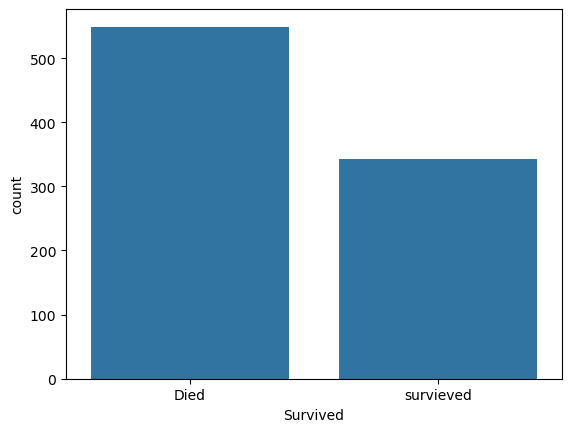

In [133]:
sns.countplot(data=df,x='Survived')

the distribution survival was about 61% died and 39% survieved

In [136]:
#pclass
df['Pclass'].unique(),df['Pclass'].value_counts()

(array([3, 1, 2], dtype=int64),
 Pclass
 3    491
 1    216
 2    184
 Name: count, dtype: int64)

<Axes: xlabel='Pclass', ylabel='count'>

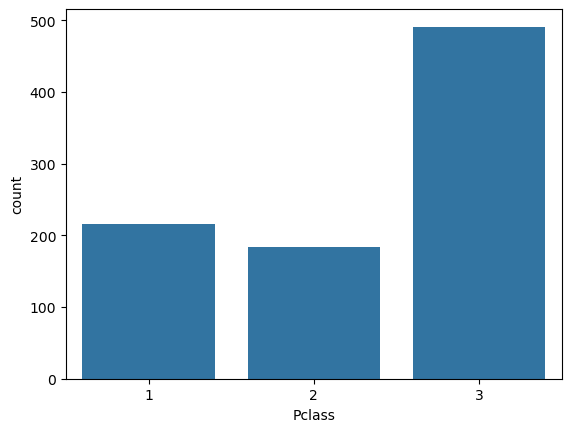

In [137]:
sns.countplot(data=df,x='Pclass')

In [138]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

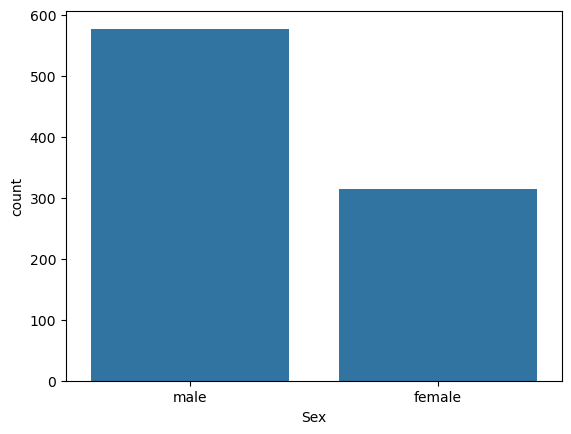

In [139]:
sns.countplot(data=df,x='Sex')

In [142]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

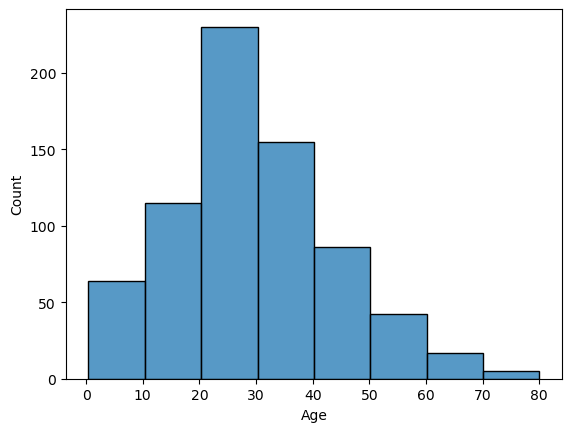

In [144]:
sns.histplot(data=df,x='Age',bins=8)

<Axes: xlabel='Age', ylabel='Density'>

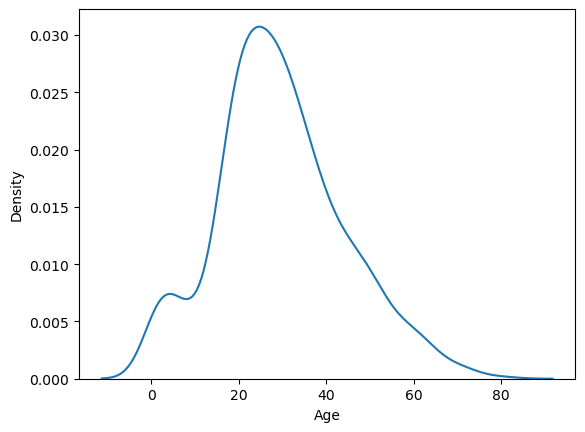

In [146]:
sns.kdeplot(data=df,x='Age')

<Axes: xlabel='Age'>

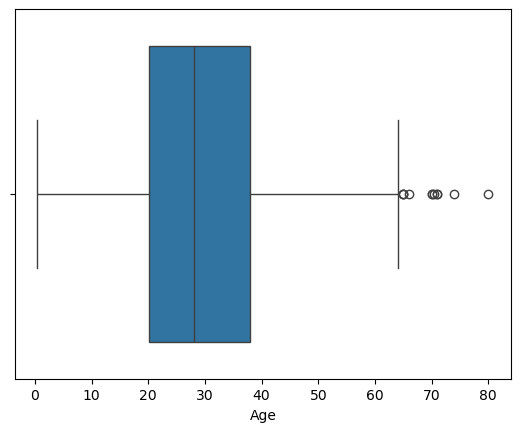

In [149]:
sns.boxplot(data=df,x='Age')

In [151]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

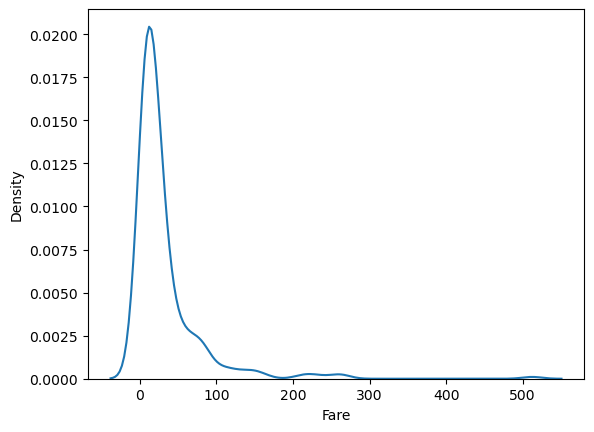

In [153]:
sns.kdeplot(data=df,x='Fare')

<Axes: xlabel='Fare'>

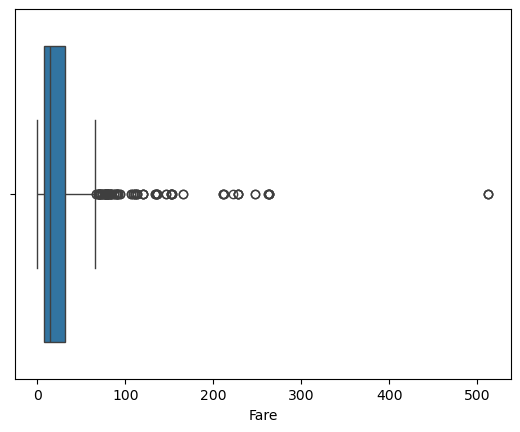

In [156]:
sns.boxplot(data=df,x='Fare')

In [158]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is alone
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False
1,2,survieved,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,survieved,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True
3,4,survieved,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Died,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True
887,888,survieved,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,True
888,889,Died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,False
889,890,survieved,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,True


<Axes: xlabel='is alone', ylabel='count'>

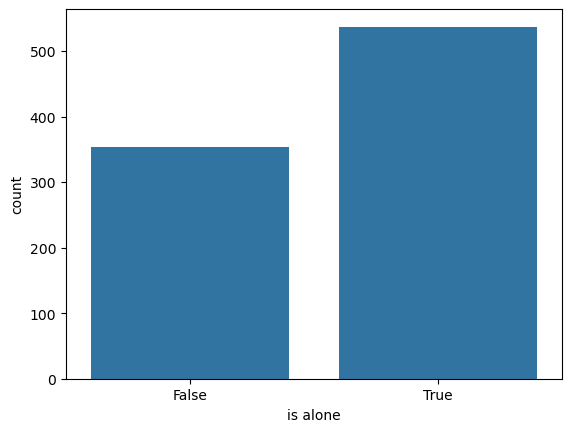

In [161]:
sns.countplot(data=df,x='is alone')

Bi variate analysis:

.column of interest:survived

In [175]:
df.groupby(['Survived','Pclass']).size()

Survived   Pclass
Died       1          80
           2          97
           3         372
survieved  1         136
           2          87
           3         119
dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

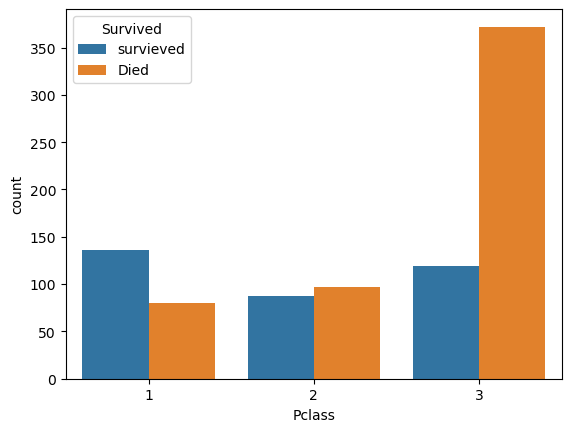

In [181]:
sns.countplot(data=df,x='Pclass',hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

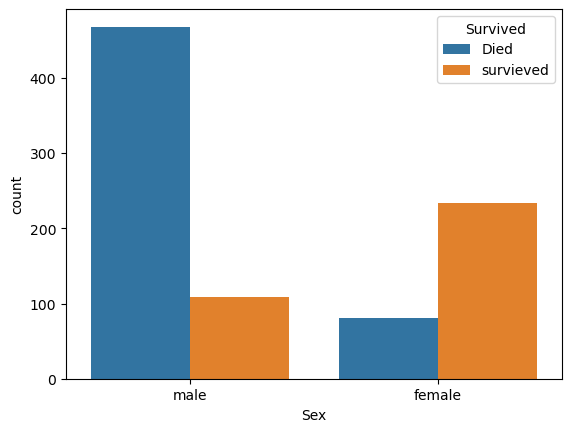

In [199]:

sns.countplot(data=df,x='Sex',hue='Survived')

In [201]:
df.groupby(['Survived','Sex']).size(),

(Survived   Sex   
 Died       female     81
            male      468
 survieved  female    233
            male      109
 dtype: int64,)

In [203]:
df.groupby(['Survived','Age']).size()

(Survived   Age 
 Died       1.0     2
            2.0     7
            3.0     1
            4.0     3
            6.0     1
                   ..
 survieved  58.0    3
            60.0    2
            62.0    2
            63.0    2
            80.0    1
 Length: 142, dtype: int64,)

<Axes: xlabel='Age', ylabel='Count'>

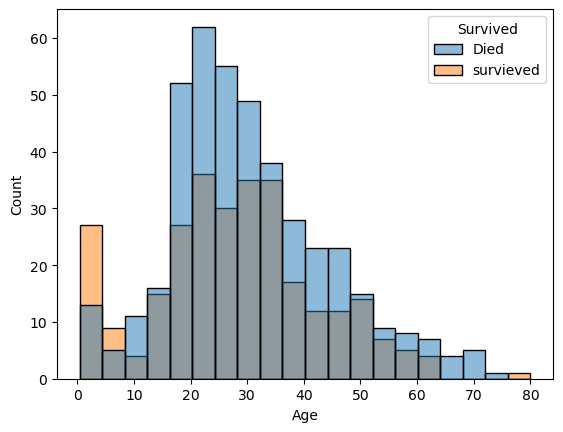

In [193]:
sns.histplot(data=df,x='Age',hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

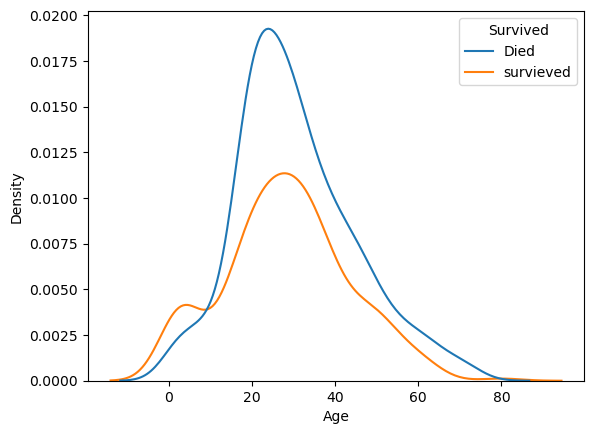

In [195]:
sns.kdeplot(data=df,x='Age',hue='Survived')

In [207]:
df.groupby(['Survived','Fare']).size()

Survived   Fare    
Died       0.0000      14
           4.0125       1
           5.0000       1
           6.2375       1
           6.4375       1
                       ..
survieved  227.5250     3
           247.5208     1
           262.3750     2
           263.0000     2
           512.3292     3
Length: 330, dtype: int64

<Axes: xlabel='Fare', ylabel='Density'>

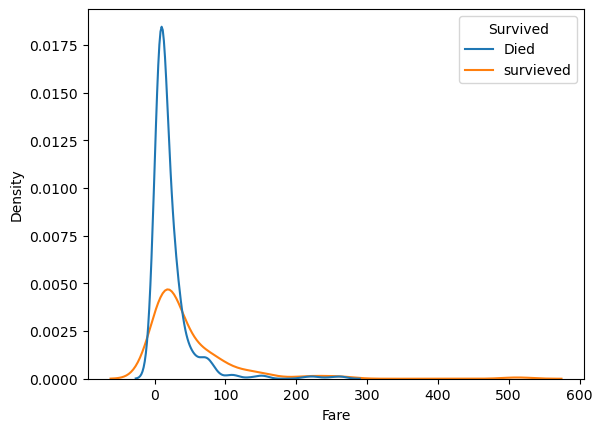

In [213]:
sns.kdeplot(data=df,x='Fare',hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

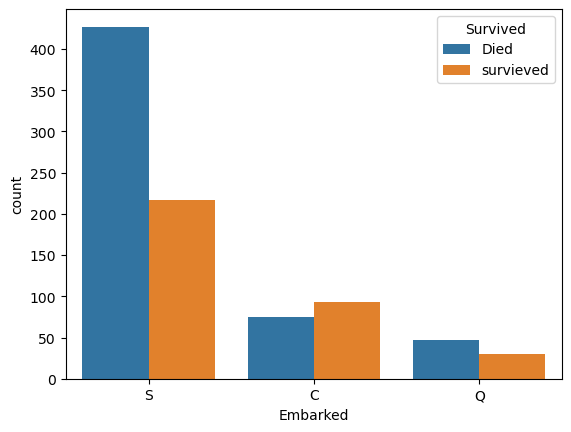

In [215]:
sns.countplot(data=df,x='Embarked',hue='Survived')

<Axes: xlabel='is alone', ylabel='count'>

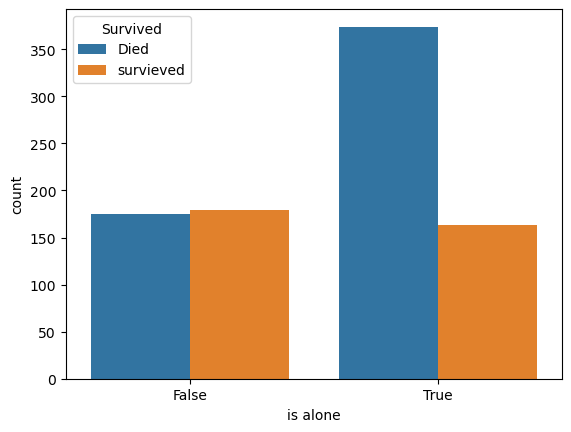

In [219]:
sns.countplot(data=df,x='is alone',hue='Survived')

multi variate analysis:

C:\Users\LAP ME\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


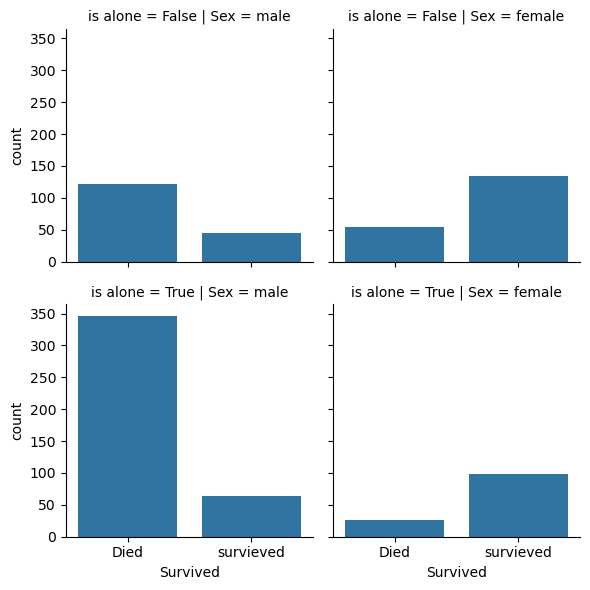

In [224]:
visual=sns.FacetGrid(data=df,row='is alone',col='Sex')
visual.map(sns.countplot,'Survived')

C:\Users\LAP ME\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


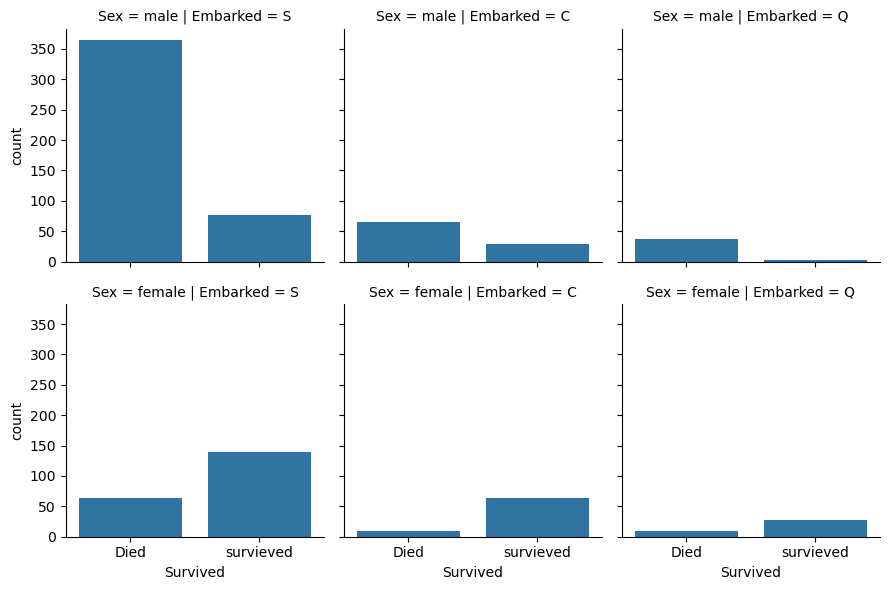

In [232]:
visual=sns.FacetGrid(data=df,row='Sex',col='Embarked')
visual.map(sns.countplot,'Survived')